In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

air_quality_data_who_path = 'Resources\World_Health_Organization\Air_Quality_Data_WHO.csv'
population_Vs_Depression_path = 'Resources\Global_Burden_of_Disease\Population_Vs_Depression.csv'

air_quality_data_who = pd.read_csv(air_quality_data_who_path)
population_Vs_Depression = pd.read_csv(population_Vs_Depression_path)

merged_data = pd.merge(air_quality_data_who, population_Vs_Depression, on=["WHO Country Name","Year"], how="inner")
merged_data['Population'] = merged_data['Population'].astype(int)
merged_data['Nbr. Cases in Pop.'] = merged_data['Nbr. Cases in Pop.'].astype(int)

column_PM25 = "PM2.5 (μg/m3)"
column_PM10 = "PM10 (μg/m3)"
column_NO2 = "NO2 (μg/m3)"
column_nbrcases = "Nbr. Cases in Pop."
column_percentprev = "Percent Prevalence"

merged_data

,WHO Region,Country Code,WHO Country Name,Location,Year,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3),Reference,Age Group,Gender,Disorder,Population,Nbr. Cases in Pop.,Percent Prevalence
0,Western Pacific Region,AUS,Australia,Adelaide,2012,7.30,16.53,8.93,EPA South Australia,All Ages,both,Depressive disorders,22265337,1123217,5.04
1,Western Pacific Region,AUS,Australia,Palmerston,2012,12.00,25.90,7.00,NEPM,All Ages,both,Depressive disorders,22265337,1123217,5.04
2,Western Pacific Region,AUS,Australia,Adelaide,2013,7.25,16.87,8.65,EPA South Australia,All Ages,both,Depressive disorders,22607619,1132312,5.01
3,Western Pacific Region,AUS,Australia,Darwin,2013,6.90,19.80,7.80,NT-EPA,All Ages,both,Depressive disorders,22607619,1132312,5.01
4,Western Pacific Region,AUS,Australia,Newcastle/Lower Hunter,2013,7.94,22.01,17.01,Office of Environment and Heritage NSW Government,All Ages,both,Depressive disorders,22607619,1132312,5.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,Region of the Americas,USA,United States of America,San Jose-Sunnyvale-Santa Clara (Ca),2019,4.90,18.10,20.00,Environmental Protection Agency,All Ages,both,Depressive disorders,327978729,15290457,4.66
518,Region of the Americas,USA,United States of America,Santa Maria-Santa Barbara (Ca),2019,4.80,14.80,3.45,Environmental Protection Agency,All Ages,both,Depressive disorders,327978729,15290457,4.66
519,Region of the Americas,USA,United States of America,Stockton-Lodi (Ca),2019,9.30,26.35,15.55,Environmental Protection Agency,All Ages,both,Depressive disorders,327978729,15290457,4.66
520,Region of the Americas,USA,United States of America,Tucson (Az),2019,3.45,18.24,13.90,Environmental Protection Agency,All Ages,both,Depressive disorders,327978729,15290457,4.66


In [2]:
#Checking for missing values
print(merged_data.isnull().sum())

WHO Region            0
Country Code          0
WHO Country Name      0
Location              0
Year                  0
PM2.5 (μg/m3)         0
PM10 (μg/m3)          0
NO2 (μg/m3)           0
Reference             0
Age Group             0
Gender                0
Disorder              0
Population            0
Nbr. Cases in Pop.    0
Percent Prevalence    0
dtype: int64


In [3]:
#Dropping the missing values
merged_data = merged_data.dropna()

# Print the count of null values after dropping
print(merged_data.isnull().sum())

WHO Region            0
Country Code          0
WHO Country Name      0
Location              0
Year                  0
PM2.5 (μg/m3)         0
PM10 (μg/m3)          0
NO2 (μg/m3)           0
Reference             0
Age Group             0
Gender                0
Disorder              0
Population            0
Nbr. Cases in Pop.    0
Percent Prevalence    0
dtype: int64


In [4]:
#Counting the number of unique regions, countries and cities

num_regions = merged_data["WHO Region"].nunique()
print("Number of WHO Regions: ", num_regions)
num_countries = merged_data["WHO Country Name"].nunique()
print("Number of Countries: ", num_countries)
num_cities = merged_data["Location"].nunique()
print("Number of Cities: ", num_cities)

Number of WHO Regions:  3
Number of Countries:  10
Number of Cities:  164


In [5]:
pm25_mean = merged_data[column_PM25].mean()
pm25_median = merged_data[column_PM25].median()
pm25_mode = merged_data[column_PM25].value_counts().idxmax()
pm25_skewness = merged_data[column_PM25].skew()
pm25_min = merged_data[column_PM25].min()  
pm25_max = merged_data[column_PM25].max()  

pm10_mean = merged_data[column_PM10].mean()
pm10_median = merged_data[column_PM10].median()
pm10_mode = merged_data[column_PM10].value_counts().idxmax()
pm10_skewness = merged_data[column_PM10].skew()
pm10_min = merged_data[column_PM10].min()  
pm10_max = merged_data[column_PM10].max()

no2_mean = merged_data[column_NO2].mean()
no2_median = merged_data[column_NO2].median()
no2_mode = merged_data[column_NO2].value_counts().idxmax()
no2_skewness = merged_data[column_NO2].skew()
no2_min = merged_data[column_NO2].min()
no2_max = merged_data[column_NO2].max()

nbrcases_mean = merged_data[column_nbrcases].mean()
nbrcases_median = merged_data[column_nbrcases].median()
nbrcases_mode = merged_data[column_nbrcases].value_counts().idxmax()
nbrcases_skewness = merged_data[column_nbrcases].skew()
nbrcases_min = merged_data[column_nbrcases].min()  
nbrcases_max = merged_data[column_nbrcases].max()  

percentcases_mean = merged_data[column_percentprev].mean()
percentcases_median = merged_data[column_percentprev].median()
percentcases_mode = merged_data[column_percentprev].value_counts().idxmax()
percentcases_skewness = merged_data[column_percentprev].skew()
percentcases_min = merged_data[column_percentprev].min()
percentcases_max = merged_data[column_percentprev].max()

summary_dict = {
    "PM2.5": {
        "Mean": pm25_mean,
        "Median": pm25_median,
        "Mode": pm25_mode,
        "Min": pm25_min,
        "Max": pm25_max,
        "Skewness": pm25_skewness
        
    },
    "PM10": {
        "Mean": pm10_mean,
        "Median": pm10_median,
        "Mode": pm10_mode,
        "Min": pm10_min,
        "Max": pm10_max,
        "Skewness": pm10_skewness
        
    },
    "NO2": {
        "Mean": no2_mean,
        "Median": no2_median,
        "Mode": no2_mode,
        "Min": no2_min,
        "Max": no2_max,
        "Skewness": no2_skewness       
    },
    
    "Number Cases": {
        "Mean": nbrcases_mean,
        "Median": nbrcases_median,
        "Mode": nbrcases_mode,
        "Min": nbrcases_min,
        "Max": nbrcases_max,
        "Skewness": nbrcases_skewness
        
    },
    "Percent Cases": {
        "Mean": percentcases_mean,
        "Median": percentcases_median,
        "Mode": percentcases_mode,
        "Min": percentcases_min,
        "Max": percentcases_max,
        "Skewness": percentcases_skewness
        
    }
}

summary_df = pd.DataFrame(summary_dict)
summary_df.round(2)

,PM2.5,PM10,NO2,Number Cases,Percent Cases
Mean,12.23,24.46,19.41,6258419.10,4.03
Median,10.36,23.61,17.68,1322605.00,4.65
Mode,23.00,44.00,35.72,14916192.00,4.66
Min,1.80,3.80,0.80,117896.00,2.52
Max,29.81,47.00,47.00,15290457.00,5.04
Skewness,0.78,0.40,0.47,0.51,-0.57


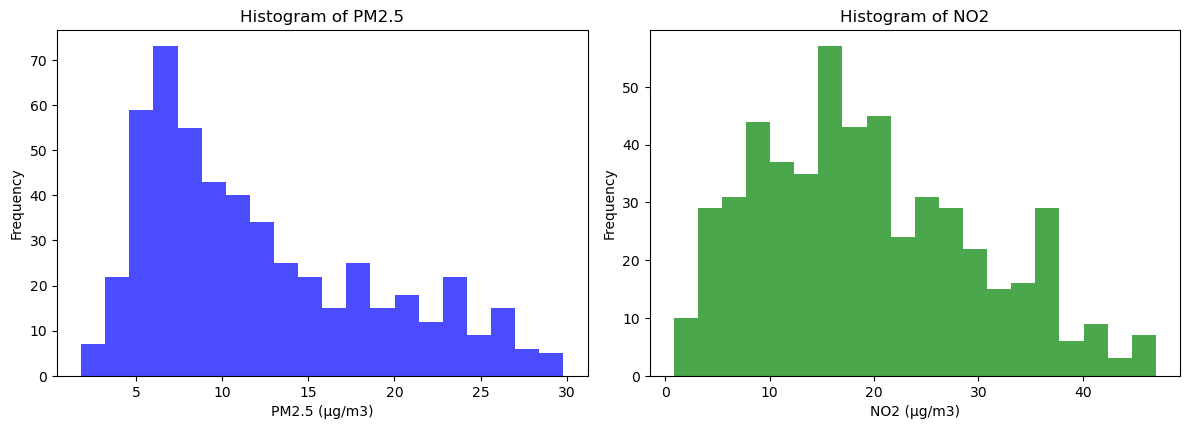

In [6]:
#Examination of data for normal distribution
plt.figure(figsize=(12, 8))

# Plot for PM2.5
plt.subplot(2, 2, 1)
plt.hist(merged_data[column_PM25], bins=20, color='blue', alpha=0.7)
plt.title('Histogram of PM2.5')
plt.xlabel('PM2.5 (μg/m3)')
plt.ylabel('Frequency')

# Plot for NO2
plt.subplot(2, 2, 2)
plt.hist(merged_data[column_NO2], bins=20, color='green', alpha=0.7)
plt.title('Histogram of NO2')
plt.xlabel('NO2 (μg/m3)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

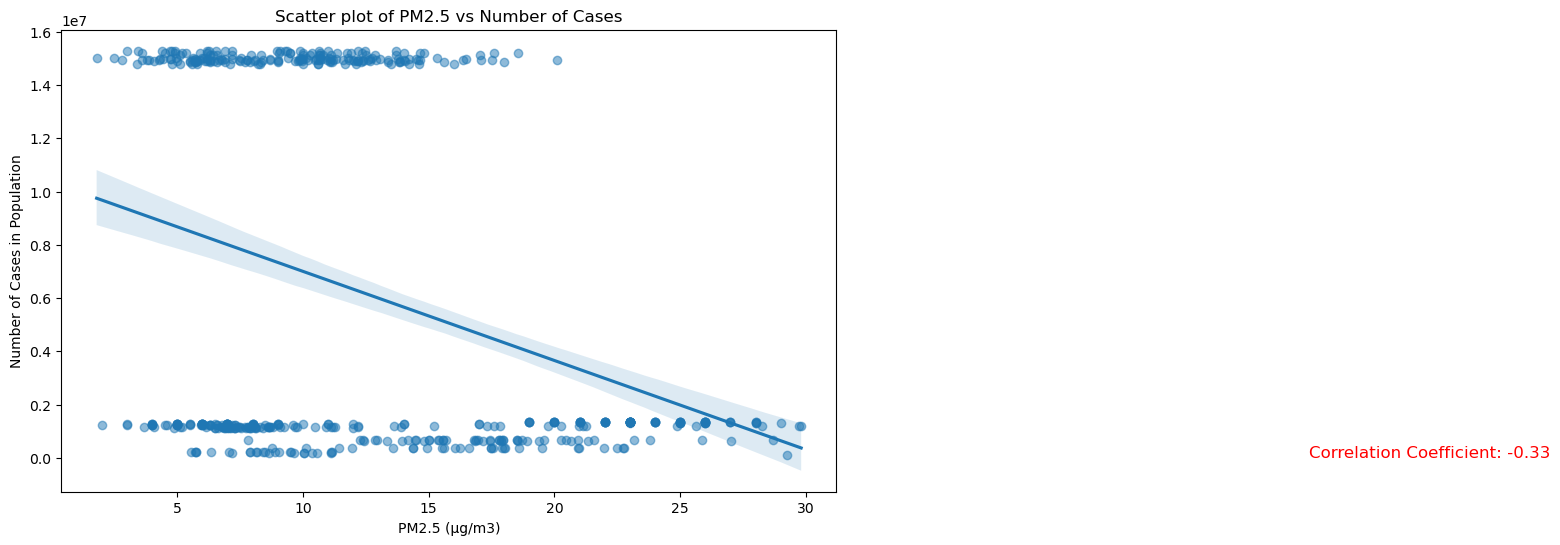

In [7]:
import seaborn as sns
import scipy.stats as stats

# Calculate correlation coefficient
correlation_coefficient = merged_data[[column_PM25, column_nbrcases]].corr().iloc[0, 1]

# Plot scatterplot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x=column_PM25, y=column_nbrcases, data=merged_data, scatter_kws={'alpha':0.5})
plt.title('Scatter plot of PM2.5 vs Number of Cases')
plt.xlabel('PM2.5 (μg/m3)')
plt.ylabel('Number of Cases in Population')

# Add correlation coefficient to the plot
plt.text(50, 1500, f'Correlation Coefficient: {correlation_coefficient:.2f}', fontsize=12, color='red')

plt.show()
